In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [4]:
le = LabelEncoder()
images = []
labels = []

training_path = 'data/raw/character_set1/training_data/'
testing_path = 'data/raw/character_set1/testing_data/'


In [5]:
dir_list = os.listdir(training_path)
for i in dir_list:
  dir = os.path.join(training_path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    images.append(img)
    labels.append(i)

## Print out details of X and y

In [6]:
X = np.array(images)
print("len(X): ",len(X))
print("X.shape: ", X.shape)

y = np.array(labels)
print("len(y): ",len(y))
print("y.shape: ", y.shape)


len(X):  20628
X.shape:  (20628, 64, 64, 3)
len(y):  20628
y.shape:  (20628,)


In [7]:
le = LabelEncoder()
y = le.fit_transform(y)
X_sh, y_sh = shuffle(X, y, random_state=42)

# Create Keras model
create a neural network model

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

/Users/nattapat/Library/Python/3.11/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])


Epoch 1/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5528 - loss: 1.6243 - val_accuracy: 0.9302 - val_loss: 0.2589
Epoch 2/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9323 - loss: 0.2233 - val_accuracy: 0.9338 - val_loss: 0.2066
Epoch 3/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9492 - loss: 0.1442 - val_accuracy: 0.9460 - val_loss: 0.1654
Epoch 4/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9592 - loss: 0.1144 - val_accuracy: 0.9460 - val_loss: 0.1902
Epoch 5/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9669 - loss: 0.0889 - val_accuracy: 0.9527 - val_loss: 0.1723
Epoch 6/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9560 - loss: 0.1322 - val_accuracy: 0.9573 - val_loss: 0.1488
Epoch 7/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9767 - loss: 0.0643 - val_accuracy: 0.9634 - val_loss: 0.1405
Epoch 8/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9723 - loss: 0.0662 - va

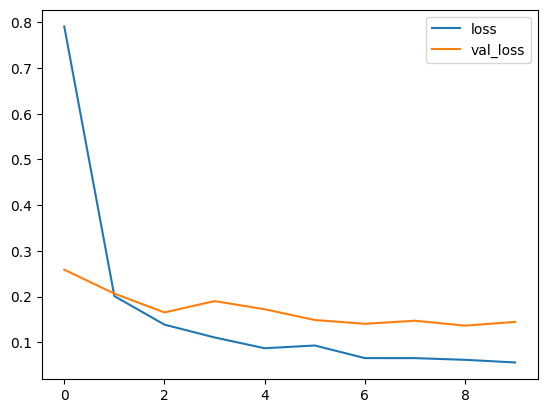

In [11]:
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=25, epochs=10)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [12]:
test_images = []
test_labels = []

dir_list = os.listdir(testing_path)
for i in dir_list:
  dir = os.path.join(testing_path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    test_images.append(img)
    test_labels.append(i)

In [13]:
X_test = np.array(test_images)
y_test = np.array(test_labels)
le = LabelEncoder()
y_test = le.fit_transform(y_test) 

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(test_loss,test_accuracy )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9717 - loss: 0.0669
0.04910172149538994 0.9811508059501648


In [15]:
def detect_text_regions(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours (regions of characters)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    regions = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 10 and h > 10:  # filter out too small regions
            regions.append((x, y, w, h))
            
    return regions

In [ ]:
def recognize_characters(image, model, label_encoder):
    # Detect regions with text (characters)
    regions = detect_text_regions(image)
    print(regions)
    characters = []
    for (x, y, w, h) in regions:
        # Crop the character from the image
        char_image = image[y:y+h, x:x+w]
        char_image_resized = cv2.resize(char_image, (64, 64))  # Resize to match input size
        char_image_normalized = char_image_resized / 255.0  # Normalize

        # Predict the character using the model
        cv2.imshow('image after resized',char_image_normalized)
        cv2.waitKey(0)  # Wait indefinitely for a key press
        cv2.destroyAllWindows() 
        prediction = model.predict(np.expand_dims(char_image_normalized, axis=0))  # Add batch dimension
        predicted_class = np.argmax(prediction, axis=1)
        
        # Convert the predicted class index to the character using LabelEncoder
        predicted_char = label_encoder.inverse_transform(predicted_class)[0]
        characters.append(predicted_char)
    
    return characters
imggg = 'data/raw/character_set1/Test_1.png'
image = cv2.imread(imggg)
cv2.imshow('image', image)
cv2.waitKey(0)  # Wait indefinitely for a key press
cv2.destroyAllWindows() 
print(recognize_characters(image, model, le))


2024-11-16 17:57:33.956 Python[37847:398931] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


[(292, 128, 24, 23), (268, 128, 22, 24), (228, 128, 12, 24), (75, 128, 23, 24), (50, 128, 22, 24), (241, 122, 25, 30), (99, 122, 34, 29), (168, 118, 34, 33), (19, 118, 33, 33), (203, 117, 27, 35), (132, 117, 25, 35), (577, 53, 15, 28), (268, 53, 15, 28), (188, 53, 32, 29), (698, 52, 21, 30), (648, 52, 48, 29), (550, 52, 25, 29), (520, 52, 28, 30), (490, 52, 28, 42), (384, 52, 28, 30), (315, 52, 32, 29), (285, 52, 28, 30), (221, 52, 25, 30), (124, 52, 28, 30), (98, 52, 25, 29), (44, 52, 32, 29), (594, 42, 19, 40), (364, 42, 19, 40), (248, 42, 19, 40), (78, 42, 19, 40), (614, 40, 32, 41), (473, 40, 15, 41), (154, 40, 32, 42), (21, 40, 21, 41), (429, 39, 42, 42)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/st